In [1]:
%matplotlib inline

In [3]:
import fastcat as fc
import numpy as np
import matplotlib.pyplot as plt

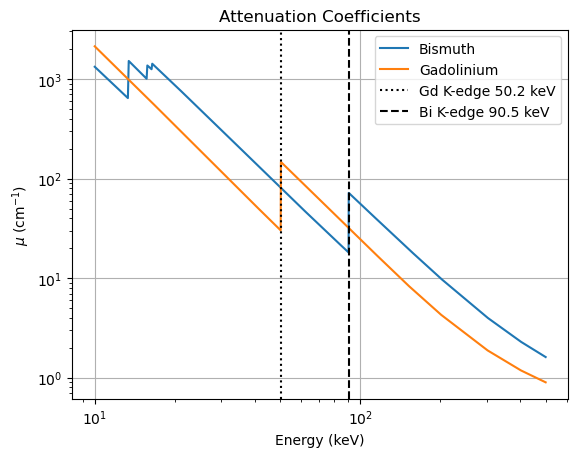

In [5]:
# Get attenuation coefficient for Bismuth

mu_bi=fc.get_mu(z=83)
# Get attenuation coefficient for Gadolinium
mu_gd=fc.get_mu(z=64)

energies = np.linspace(10, 500, 5000)

mu_bismuth = [mu_bi(energy) for energy in energies]
mu_gadolinium = [mu_gd(energy) for energy in energies]

# Add the k-edge energies to the plot
k_bi = 90.5
k_gd = 50.2

plt.figure()
plt.title('Attenuation Coefficients')
plt.loglog(energies, mu_bismuth, label='Bismuth')
plt.loglog(energies, mu_gadolinium, label='Gadolinium')
plt.axvline(k_gd, color='k', linestyle=':', label=f'Gd K-edge {k_gd} keV')

plt.axvline(k_bi, color='k', linestyle='--', label=f'Bi K-edge {k_bi} keV')
plt.xlabel('Energy (keV)')
plt.ylabel('$\mu$ (cm$^{-1}$)')
plt.legend()
plt.grid()

# Save the plot
# plt.savefig('attenuation_coefficients_bi_gd.png', dpi=300)

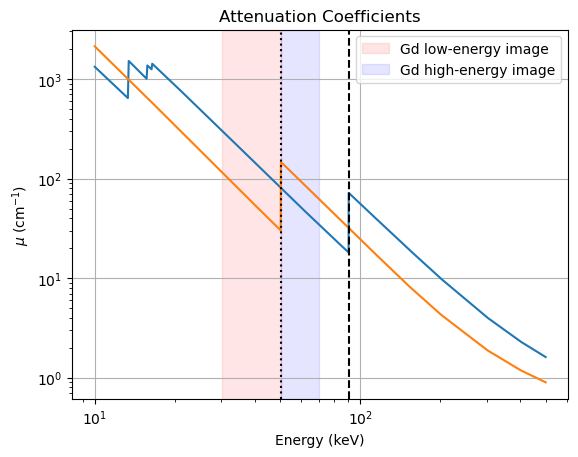

In [6]:
# Get attenuation coefficient for Bismuth

mu_bi=fc.get_mu(z=83)
# Get attenuation coefficient for Gadolinium
mu_gd=fc.get_mu(z=64)

energies = np.linspace(10, 500, 5000)

mu_bismuth = [mu_bi(energy) for energy in energies]
mu_gadolinium = [mu_gd(energy) for energy in energies]

# Add the k-edge energies to the plot
k_bi = 90.5
k_gd = 50.2

plt.figure()
plt.title('Attenuation Coefficients')
plt.loglog(energies, mu_bismuth)
plt.loglog(energies, mu_gadolinium)
plt.axvline(k_gd, color='k', linestyle=':')

plt.axvline(k_bi, color='k', linestyle='--')
# Make a light red box around the k-edges 
plt.axvspan(k_gd-20, k_gd, color='r', alpha=0.1, label='Gd low-energy image')
plt.axvspan(k_gd, k_gd + 20, color='b', alpha=0.1, label='Gd high-energy image')
plt.xlabel('Energy (keV)')
plt.ylabel('$\mu$ (cm$^{-1}$)')
plt.legend()
plt.grid()

# Save the plo
# plt.savefig('attenuation_coefficients_bi_gd_labelled_regions.png', dpi=300)

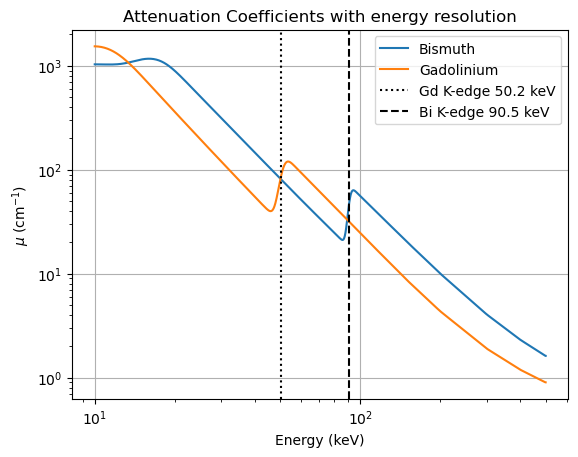

In [7]:
# Get attenuation coefficient for Bismuth

mu_bi=fc.get_mu(z=83)
# Get attenuation coefficient for Gadolinium
mu_gd=fc.get_mu(z=64)

energies = np.linspace(10, 500, 5000)

mu_bismuth = [mu_bi(energy) for energy in energies]
mu_gadolinium = [mu_gd(energy) for energy in energies]

# Filter with a 1d normal filter with a 5 keV energy resolution
from scipy.ndimage import gaussian_filter1d

# Filter with a 1d Gaussian filter with a 5 keV energy resolution
mu_bismuth = gaussian_filter1d(mu_bismuth, sigma=20)
mu_gadolinium = gaussian_filter1d(mu_gadolinium, sigma=20)

# Add the k-edge energies to the plot
k_bi = 90.5
k_gd = 50.2

plt.figure()
plt.title('Attenuation Coefficients with energy resolution')
plt.loglog(energies, mu_bismuth, label='Bismuth')
plt.loglog(energies, mu_gadolinium, label='Gadolinium')
plt.axvline(k_gd, color='k', linestyle=':', label=f'Gd K-edge {k_gd} keV')

plt.axvline(k_bi, color='k', linestyle='--', label=f'Bi K-edge {k_bi} keV')
plt.xlabel('Energy (keV)')
plt.ylabel('$\mu$ (cm$^{-1}$)')
plt.legend()
plt.grid()

# Save the plot
# plt.savefig('attenuation_coefficients_bi_gd_smoothed.png', dpi=300)

In [9]:
import spekpy as sp

In [10]:
s = sp.Spek(120,14)
s.filter('Al',4)

s2 = sp.Spek(140,14)
s2.filter('Al',4)

xx, yy = s.get_spectrum()
xx2, yy2 = s2.get_spectrum()

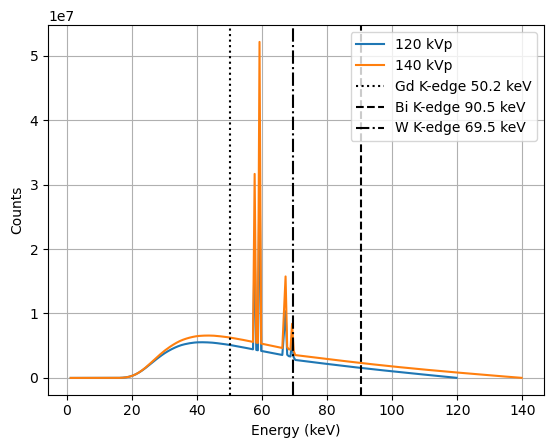

In [11]:
plt.figure()
plt.plot(xx, yy, label='120 kVp')
plt.plot(xx2, yy2, label='140 kVp')
# plot the k_bismuth and k_gadolinium lines
# plot the k_tungsten line as well
plt.axvline(k_gd, color='k', linestyle=':', label=f'Gd K-edge {k_gd} keV')
plt.axvline(k_bi, color='k', linestyle='--', label=f'Bi K-edge {k_bi} keV')
plt.axvline(69.5, color='k', linestyle='-.', label=f'W K-edge 69.5 keV')
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.grid()
plt.legend()

# Save the plot
# plt.savefig('spectra_bi_gd.png', dpi=300)

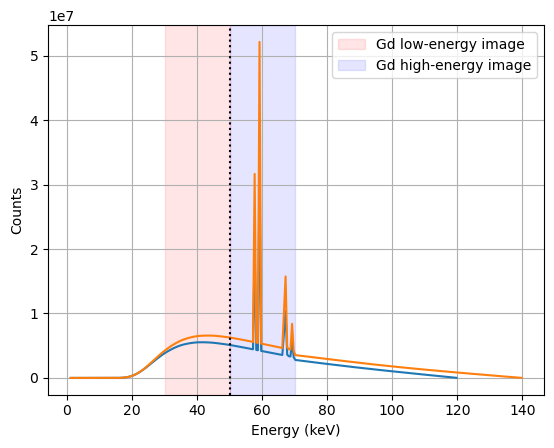

In [12]:
plt.figure()
plt.plot(xx, yy)
plt.plot(xx2, yy2)
# plot the k_bismuth and k_gadolinium lines
# plot the k_tungsten line as well
plt.axvline(k_gd, color='k', linestyle=':')
# plt.axvline(k_bi, color='k', linestyle='--')
# plt.axvline(69.5, color='k', linestyle='-.')
# Label the regions before and after the gadolinium k-edge 
plt.axvspan(k_gd-20, k_gd, color='r', alpha=0.1, label='Gd low-energy image')
plt.axvspan(k_gd, k_gd + 20, color='b', alpha=0.1, label='Gd high-energy image')
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.grid()
plt.legend()

# Save the plot
# plt.savefig('spectra_bi_gd.png', dpi=300)

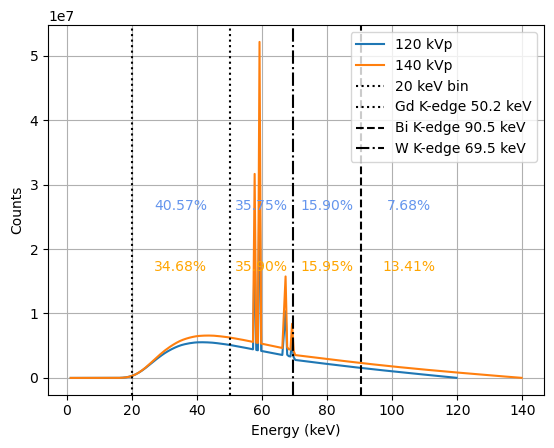

In [13]:
# Find the closes xx and xx2 values to the k-edge energies
k_bi_index = np.argmin(np.abs(xx - k_bi))
k_gd_index = np.argmin(np.abs(xx2 - k_gd))
k_W_index = np.argmin(np.abs(xx - 69.5))
k_20_index = np.argmin(np.abs(xx - 20))

k_20 = 20
k_W = 69.5
# Calculate the percent of the fluence between the k-edges 
fluence_to_gd_120 = np.sum(yy[k_20_index:k_gd_index]) / np.sum(yy)
fluence_to_gd_140 = np.sum(yy2[k_20_index:k_gd_index]) / np.sum(yy2)
fluence_gd_to_W_120 = np.sum(yy[k_gd_index:k_W_index]) / np.sum(yy)
fluence_gd_to_W_140 = np.sum(yy2[k_gd_index:k_W_index]) / np.sum(yy2)
fluence_W_to_bi_120 = np.sum(yy[k_W_index:k_bi_index]) / np.sum(yy)
fluence_W_to_bi_140 = np.sum(yy2[k_W_index:k_bi_index]) / np.sum(yy2)
fluence_bi_120 = np.sum(yy[k_bi_index:]) / np.sum(yy)
fluence_bi_140 = np.sum(yy2[k_bi_index:]) / np.sum(yy2)

plt.figure()
plt.plot(xx, yy, label='120 kVp')
plt.plot(xx2, yy2, label='140 kVp')
# plot the k_bismuth and k_gadolinium lines
# plot the k_tungsten line as well
# Show the percent of the fluence between the k-edges
plt.axvline(k_20, color='k', linestyle=':', label=f'20 keV bin')
plt.axvline(k_gd, color='k', linestyle=':', label=f'Gd K-edge {k_gd} keV')
plt.axvline(k_bi, color='k', linestyle='--', label=f'Bi K-edge {k_bi} keV')
plt.axvline(69.5, color='k', linestyle='-.', label=f'W K-edge 69.5 keV')

# show the percent of the fluence between the k-edges in each num_regions
plt.text((k_gd+20)/2, 0.5*max(yy2), f'{fluence_to_gd_120:.2%}',color='cornflowerblue',ha='center')
plt.text((k_gd+k_W)/2, 0.5*max(yy2), f'{fluence_gd_to_W_120:.2%}',color='cornflowerblue',ha='center')
plt.text((k_W+k_bi)/2, 0.5*max(yy2), f'{fluence_W_to_bi_120:.2%}',color='cornflowerblue',ha='center')
plt.text((k_bi+max(xx))/2, 0.5*max(yy2), f'{fluence_bi_120:.2%}',color='cornflowerblue',ha='center')

plt.text((k_gd+20)/2, 0.5*max(yy), f'{fluence_to_gd_140:.2%}',color='orange',ha='center')
plt.text((k_gd+k_W)/2, 0.5*max(yy), f'{fluence_gd_to_W_140:.2%}',color='orange',ha='center')
plt.text((k_W+k_bi)/2, 0.5*max(yy), f'{fluence_W_to_bi_140:.2%}',color='orange',ha='center')
plt.text((k_bi+max(xx))/2, 0.5*max(yy), f'{fluence_bi_140:.2%}',color='orange',ha='center')

plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.grid()
plt.legend()

# Save the plot
# plt.savefig('spectra_bi_gd.png', dpi=300)

37 98


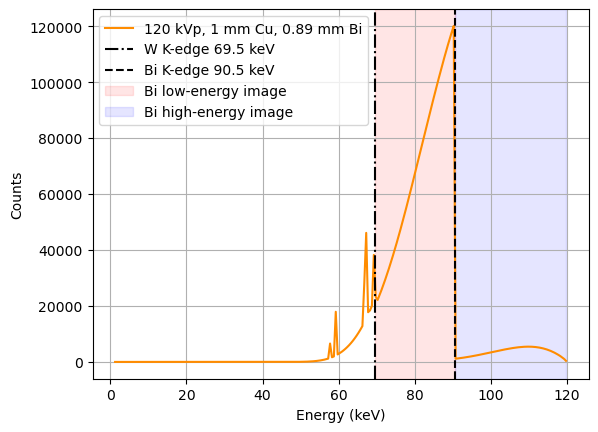

In [29]:
# Find the closes xx and xx2 values to the k-edge energies
k_bi_index = np.argmin(np.abs(xx - k_bi))
k_gd_index = np.argmin(np.abs(xx2 - k_gd))
k_W_index = np.argmin(np.abs(xx - 69.5))
k_20_index = np.argmin(np.abs(xx - 20))

s2 = sp.Spek(120,14)
s2.filter('Al',4)
s2.filter('Bi',0.89)
s2.filter('Cu',2)

xx2, yy2 = s2.get_spectrum()

k_20 = 20
k_W = 69.5
# Calculate the percent of the fluence between the k-edges 
fluence_to_gd_120 = np.sum(yy[k_20_index:k_gd_index]) / np.sum(yy)
fluence_to_gd_140 = np.sum(yy2[k_20_index:k_gd_index]) / np.sum(yy2)
fluence_gd_to_W_120 = np.sum(yy[k_gd_index:k_W_index]) / np.sum(yy)
fluence_gd_to_W_140 = np.sum(yy2[k_gd_index:k_W_index]) / np.sum(yy2)
fluence_W_to_bi_120 = np.sum(yy[k_W_index:k_bi_index]) / np.sum(yy)
fluence_W_to_bi_140 = np.sum(yy2[k_W_index:k_bi_index]) / np.sum(yy2)
fluence_bi_120 = np.sum(yy[k_bi_index:]) / np.sum(yy)
fluence_bi_140 = np.sum(yy2[k_bi_index:]) / np.sum(yy2)

# Find the mean energy in each num_regions
mean_energy_120 = np.mean(xx*(yy/np.sum(yy)))
# mean_energy_140 = np.mean(xx2*(yy2/np.sum(yy2)))
print(k_20_index,k_gd_index)
# Calculate the mean energy in each num_regions as a weighted average of the energy time the fluence in each bin
mean_energy_to_gd_120 = np.sum(xx[k_20_index:k_gd_index]*(yy[k_20_index:k_gd_index]/np.sum(yy[k_20_index:k_gd_index])))
mean_energy_to_gd_140 = np.sum(xx2[k_20_index:k_gd_index]*(yy2[k_20_index:k_gd_index]/np.sum(yy2[k_20_index:k_gd_index])))
mean_energy_gd_to_W_120 = np.sum(xx[k_gd_index:k_W_index]*(yy[k_gd_index:k_W_index]/np.sum(yy[k_gd_index:k_W_index])))
mean_energy_gd_to_W_140 = np.sum(xx2[k_gd_index:k_W_index]*(yy2[k_gd_index:k_W_index]/np.sum(yy2[k_gd_index:k_W_index])))
mean_energy_W_to_bi_120 = np.sum(xx[k_W_index:k_bi_index]*(yy[k_W_index:k_bi_index]/np.sum(yy[k_W_index:k_bi_index])))
mean_energy_W_to_bi_140 = np.sum(xx2[k_W_index:k_bi_index]*(yy2[k_W_index:k_bi_index]/np.sum(yy2[k_W_index:k_bi_index])))
mean_energy_bi_120 = np.sum(xx[k_bi_index:]*(yy[k_bi_index:]/np.sum(yy[k_bi_index:])))
mean_energy_bi_140 = np.sum(xx2[k_bi_index:]*(yy2[k_bi_index:]/np.sum(yy2[k_bi_index:])))
                                
plt.figure()
# plt.plot(xx, yy, label='120 kVp')
plt.plot(xx2, yy2, label='120 kVp, 1 mm Cu, 0.89 mm Bi',c='darkorange')
# plot the k_bismuth and k_gadolinium lines
# plot the k_tungsten line as well
# Show the percent of the fluence between the k-edges
# plt.axvline(k_20, color='k', linestyle=':', label=f'20 keV bin')
# plt.axvline(k_gd, color='k', linestyle=':', label=f'Gd K-edge {k_gd} keV')
plt.axvline(69.5, color='k', linestyle='-.', label=f'W K-edge 69.5 keV')
plt.axvline(k_bi, color='k', linestyle='--', label=f'Bi K-edge {k_bi} keV')
mu_at_mean_energy_to_gd_120 = mu_gd(mean_energy_to_gd_120)
mu_at_mean_energy_to_gd_140 = mu_bi(mean_energy_to_gd_140)
mu_at_mean_energy_gd_to_W_120 = mu_gd(mean_energy_gd_to_W_120)
mu_at_mean_energy_gd_to_W_140 = mu_bi(mean_energy_gd_to_W_140)
mu_at_mean_energy_W_to_bi_120 = mu_bi(mean_energy_W_to_bi_120)
mu_at_mean_energy_W_to_bi_140 = mu_bi(mean_energy_W_to_bi_140)
mu_at_mean_energy_bi_120 = mu_bi(mean_energy_bi_120)
mu_at_mean_energy_bi_140 = mu_bi(mean_energy_bi_140)

# show the percent of the fluence between the k-edges in each num_regions
# plt.text((k_gd+20)/2, 0.5*max(yy), f'$\mu$\n{mu_at_mean_energy_to_gd_120:.2f}\ncm$^{-1}$',color='r',ha='center',fontsize=14)
# plt.text((k_gd+k_W)/2, 0.5*max(yy), f'$\mu$\n{mu_at_mean_energy_gd_to_W_120:.2f}\ncm$^{-1}$',color='b',ha='center',fontsize=14)
# plt.text((k_W+k_bi)/2, 0.5*max(yy2), f'$\mu$\n{mu_at_mean_energy_W_to_bi_120:.2f}\ncm$^{-1}$',
#          color='r',ha='center',fontsize=14)
# plt.text((k_bi+max(xx))/2, 0.5*max(yy2), f'$\mu$\n{mu_at_mean_energy_bi_120:.2f}\ncm$^{-1}$',
#          color='b',ha='center',fontsize=14)


# show the percent of the fluence between the k-edges in each num_regions
# plt.text((k_gd+20)/2, 0.5*max(yy), f'{mean_energy_to_gd_120:.2f}\nkeV',color='r',ha='center',fontsize=14)
# plt.text((k_gd+k_W)/2, 0.5*max(yy), f'{mean_energy_gd_to_W_120:.2f}\nkeV',color='b',ha='center',fontsize=14)
# plt.text((k_W+k_bi)/2, 0.5*max(yy), f'{mean_energy_W_to_bi_120:.2f}\nkeV',color='cornflowerblue',ha='center')
# plt.text((k_bi+max(xx))/2, 0.5*max(yy), f'{mean_energy_bi_120:.2f}\nkeV',color='cornflowerblue',ha='center')

# plt.text((k_gd+20)/2, 0.5*max(yy2), f'{mean_energy_to_gd_140:.2f}\nkeV',color='orange',ha='center')
# plt.text((k_gd+k_W)/2, 0.5*max(yy2), f'{mean_energy_gd_to_W_140:.2f}\nkeV',color='red',ha='center')
# plt.text((k_W+k_bi)/2, 0.5*max(yy2), f'{mean_energy_W_to_bi_140:.2f}\nkeV',color='orange',ha='center')
# plt.text((k_bi+max(xx))/2, 0.5*max(yy2), f'{mean_energy_bi_140:.2f}\nkeV',color='orange',ha='center')

# plot the region between k_20 and k_gd in red and the next region in blue
# plt.axvspan(k_20, k_gd, color='r', alpha=0.1, label='Gd low-energy image')
# plt.axvspan(k_gd, k_W, color='b', alpha=0.1, label='Gd high-energy image')
plt.axvspan(k_W, k_bi, color='r', alpha=0.1, label='Bi low-energy image')
plt.axvspan(k_bi, max(xx2), color='b', alpha=0.1, label='Bi high-energy image')

plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.grid()
plt.legend()

# Save the plot
plt.savefig('spectra_bi_gd_mu_140_hard.png', dpi=300)

37 98


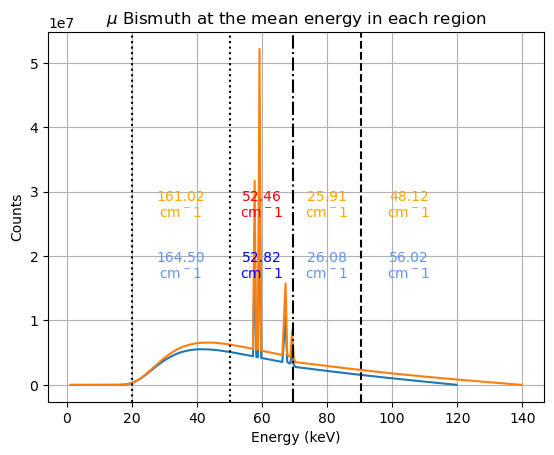

In [73]:
# Find the closes xx and xx2 values to the k-edge energies
k_bi_index = np.argmin(np.abs(xx - k_bi))
k_gd_index = np.argmin(np.abs(xx2 - k_gd))
k_W_index = np.argmin(np.abs(xx - 69.5))
k_20_index = np.argmin(np.abs(xx - 20))

k_20 = 20
k_W = 69.5
# Calculate the percent of the fluence between the k-edges 
fluence_to_gd_120 = np.sum(yy[k_20_index:k_gd_index]) / np.sum(yy)
fluence_to_gd_140 = np.sum(yy2[k_20_index:k_gd_index]) / np.sum(yy2)
fluence_gd_to_W_120 = np.sum(yy[k_gd_index:k_W_index]) / np.sum(yy)
fluence_gd_to_W_140 = np.sum(yy2[k_gd_index:k_W_index]) / np.sum(yy2)
fluence_W_to_bi_120 = np.sum(yy[k_W_index:k_bi_index]) / np.sum(yy)
fluence_W_to_bi_140 = np.sum(yy2[k_W_index:k_bi_index]) / np.sum(yy2)
fluence_bi_120 = np.sum(yy[k_bi_index:]) / np.sum(yy)
fluence_bi_140 = np.sum(yy2[k_bi_index:]) / np.sum(yy2)

# Find the mean energy in each num_regions
mean_energy_120 = np.mean(xx*(yy/np.sum(yy)))
mean_energy_140 = np.mean(xx2*(yy2/np.sum(yy2)))
print(k_20_index,k_gd_index)
# Calculate the mean energy in each num_regions as a weighted average of the energy time the fluence in each bin
mean_energy_to_gd_120 = np.sum(xx[k_20_index:k_gd_index]*(yy[k_20_index:k_gd_index]/np.sum(yy[k_20_index:k_gd_index])))
mean_energy_to_gd_140 = np.sum(xx2[k_20_index:k_gd_index]*(yy2[k_20_index:k_gd_index]/np.sum(yy2[k_20_index:k_gd_index])))
mean_energy_gd_to_W_120 = np.sum(xx[k_gd_index:k_W_index]*(yy[k_gd_index:k_W_index]/np.sum(yy[k_gd_index:k_W_index])))
mean_energy_gd_to_W_140 = np.sum(xx2[k_gd_index:k_W_index]*(yy2[k_gd_index:k_W_index]/np.sum(yy2[k_gd_index:k_W_index])))
mean_energy_W_to_bi_120 = np.sum(xx[k_W_index:k_bi_index]*(yy[k_W_index:k_bi_index]/np.sum(yy[k_W_index:k_bi_index])))
mean_energy_W_to_bi_140 = np.sum(xx2[k_W_index:k_bi_index]*(yy2[k_W_index:k_bi_index]/np.sum(yy2[k_W_index:k_bi_index])))
mean_energy_bi_120 = np.sum(xx[k_bi_index:]*(yy[k_bi_index:]/np.sum(yy[k_bi_index:])))
mean_energy_bi_140 = np.sum(xx2[k_bi_index:]*(yy2[k_bi_index:]/np.sum(yy2[k_bi_index:])))
                                
plt.figure()
plt.plot(xx, yy, label='120 kVp')
plt.plot(xx2, yy2, label='140 kVp')
# plot the k_bismuth and k_gadolinium lines
# plot the k_tungsten line as well
# Show the percent of the fluence between the k-edges
plt.axvline(k_20, color='k', linestyle=':', label=f'20 keV bin')
plt.axvline(k_gd, color='k', linestyle=':', label=f'Gd K-edge {k_gd} keV')
plt.axvline(k_bi, color='k', linestyle='--', label=f'Bi K-edge {k_bi} keV')
plt.axvline(69.5, color='k', linestyle='-.', label=f'W K-edge 69.5 keV')

# mu_at_mean_energy_120 = mu_bi(mean_energy_120)
# mu_at_mean_energy_140 = mu_bi(mean_energy_140)

mu_at_mean_energy_to_gd_120 = mu_bi(mean_energy_to_gd_120)
mu_at_mean_energy_to_gd_140 = mu_bi(mean_energy_to_gd_140)
mu_at_mean_energy_gd_to_W_120 = mu_bi(mean_energy_gd_to_W_120)
mu_at_mean_energy_gd_to_W_140 = mu_bi(mean_energy_gd_to_W_140)
mu_at_mean_energy_W_to_bi_120 = mu_bi(mean_energy_W_to_bi_120)
mu_at_mean_energy_W_to_bi_140 = mu_bi(mean_energy_W_to_bi_140)
mu_at_mean_energy_bi_120 = mu_bi(mean_energy_bi_120)
mu_at_mean_energy_bi_140 = mu_bi(mean_energy_bi_140)

# show the percent of the fluence between the k-edges in each num_regions
plt.text((k_gd+20)/2, 0.5*max(yy), f'{mu_at_mean_energy_to_gd_120:.2f}\ncm$^{-1}$',color='cornflowerblue',ha='center')
plt.text((k_gd+k_W)/2, 0.5*max(yy), f'{mu_at_mean_energy_gd_to_W_120:.2f}\ncm$^{-1}$',color='blue',ha='center')
plt.text((k_W+k_bi)/2, 0.5*max(yy), f'{mu_at_mean_energy_W_to_bi_120:.2f}\ncm$^{-1}$',color='cornflowerblue',ha='center')
plt.text((k_bi+max(xx))/2, 0.5*max(yy), f'{mu_at_mean_energy_bi_120:.2f}\ncm$^{-1}$',color='cornflowerblue',ha='center')

plt.text((k_gd+20)/2, 0.5*max(yy2), f'{mu_at_mean_energy_to_gd_140:.2f}\ncm$^{-1}$',color='orange',ha='center')
plt.text((k_gd+k_W)/2, 0.5*max(yy2), f'{mu_at_mean_energy_gd_to_W_140:.2f}\ncm$^{-1}$',color='red',ha='center')
plt.text((k_W+k_bi)/2, 0.5*max(yy2), f'{mu_at_mean_energy_W_to_bi_140:.2f}\ncm$^{-1}$',color='orange',ha='center')
plt.text((k_bi+max(xx))/2, 0.5*max(yy2), f'{mu_at_mean_energy_bi_140:.2f}\ncm$^{-1}$',color='orange',ha='center')

plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.grid()
plt.title('$\mu$ Bismuth at the mean energy in each region')
# plt.legend()

# Save the plot
plt.savefig('spectra_bi_gd_mu_bi.png', dpi=300)

37 98


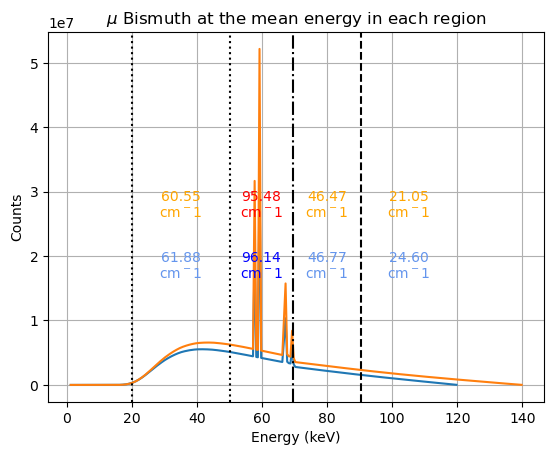

In [75]:
# Find the closes xx and xx2 values to the k-edge energies
k_bi_index = np.argmin(np.abs(xx - k_bi))
k_gd_index = np.argmin(np.abs(xx2 - k_gd))
k_W_index = np.argmin(np.abs(xx - 69.5))
k_20_index = np.argmin(np.abs(xx - 20))

k_20 = 20
k_W = 69.5
# Calculate the percent of the fluence between the k-edges 
fluence_to_gd_120 = np.sum(yy[k_20_index:k_gd_index]) / np.sum(yy)
fluence_to_gd_140 = np.sum(yy2[k_20_index:k_gd_index]) / np.sum(yy2)
fluence_gd_to_W_120 = np.sum(yy[k_gd_index:k_W_index]) / np.sum(yy)
fluence_gd_to_W_140 = np.sum(yy2[k_gd_index:k_W_index]) / np.sum(yy2)
fluence_W_to_bi_120 = np.sum(yy[k_W_index:k_bi_index]) / np.sum(yy)
fluence_W_to_bi_140 = np.sum(yy2[k_W_index:k_bi_index]) / np.sum(yy2)
fluence_bi_120 = np.sum(yy[k_bi_index:]) / np.sum(yy)
fluence_bi_140 = np.sum(yy2[k_bi_index:]) / np.sum(yy2)

# Find the mean energy in each num_regions
mean_energy_120 = np.mean(xx*(yy/np.sum(yy)))
mean_energy_140 = np.mean(xx2*(yy2/np.sum(yy2)))
print(k_20_index,k_gd_index)
# Calculate the mean energy in each num_regions as a weighted average of the energy time the fluence in each bin
mean_energy_to_gd_120 = np.sum(xx[k_20_index:k_gd_index]*(yy[k_20_index:k_gd_index]/np.sum(yy[k_20_index:k_gd_index])))
mean_energy_to_gd_140 = np.sum(xx2[k_20_index:k_gd_index]*(yy2[k_20_index:k_gd_index]/np.sum(yy2[k_20_index:k_gd_index])))
mean_energy_gd_to_W_120 = np.sum(xx[k_gd_index:k_W_index]*(yy[k_gd_index:k_W_index]/np.sum(yy[k_gd_index:k_W_index])))
mean_energy_gd_to_W_140 = np.sum(xx2[k_gd_index:k_W_index]*(yy2[k_gd_index:k_W_index]/np.sum(yy2[k_gd_index:k_W_index])))
mean_energy_W_to_bi_120 = np.sum(xx[k_W_index:k_bi_index]*(yy[k_W_index:k_bi_index]/np.sum(yy[k_W_index:k_bi_index])))
mean_energy_W_to_bi_140 = np.sum(xx2[k_W_index:k_bi_index]*(yy2[k_W_index:k_bi_index]/np.sum(yy2[k_W_index:k_bi_index])))
mean_energy_bi_120 = np.sum(xx[k_bi_index:]*(yy[k_bi_index:]/np.sum(yy[k_bi_index:])))
mean_energy_bi_140 = np.sum(xx2[k_bi_index:]*(yy2[k_bi_index:]/np.sum(yy2[k_bi_index:])))
                                
plt.figure()
plt.plot(xx, yy, label='120 kVp')
plt.plot(xx2, yy2, label='140 kVp')
# plot the k_bismuth and k_gadolinium lines
# plot the k_tungsten line as well
# Show the percent of the fluence between the k-edges
plt.axvline(k_20, color='k', linestyle=':', label=f'20 keV bin')
plt.axvline(k_gd, color='k', linestyle=':', label=f'Gd K-edge {k_gd} keV')
plt.axvline(k_bi, color='k', linestyle='--', label=f'Bi K-edge {k_bi} keV')
plt.axvline(69.5, color='k', linestyle='-.', label=f'W K-edge 69.5 keV')

# mu_at_mean_energy_120 = mu_bi(mean_energy_120)
# mu_at_mean_energy_140 = mu_bi(mean_energy_140)

mu_at_mean_energy_to_gd_120 = mu_gd(mean_energy_to_gd_120)
mu_at_mean_energy_to_gd_140 = mu_gd(mean_energy_to_gd_140)
mu_at_mean_energy_gd_to_W_120 = mu_gd(mean_energy_gd_to_W_120)
mu_at_mean_energy_gd_to_W_140 = mu_gd(mean_energy_gd_to_W_140)
mu_at_mean_energy_W_to_bi_120 = mu_gd(mean_energy_W_to_bi_120)
mu_at_mean_energy_W_to_bi_140 = mu_gd(mean_energy_W_to_bi_140)
mu_at_mean_energy_bi_120 = mu_gd(mean_energy_bi_120)
mu_at_mean_energy_bi_140 = mu_gd(mean_energy_bi_140)

# show the percent of the fluence between the k-edges in each num_regions
plt.text((k_gd+20)/2, 0.5*max(yy), f'{mu_at_mean_energy_to_gd_120:.2f}\ncm$^{-1}$',color='cornflowerblue',ha='center')
plt.text((k_gd+k_W)/2, 0.5*max(yy), f'{mu_at_mean_energy_gd_to_W_120:.2f}\ncm$^{-1}$',color='blue',ha='center')
plt.text((k_W+k_bi)/2, 0.5*max(yy), f'{mu_at_mean_energy_W_to_bi_120:.2f}\ncm$^{-1}$',color='cornflowerblue',ha='center')
plt.text((k_bi+max(xx))/2, 0.5*max(yy), f'{mu_at_mean_energy_bi_120:.2f}\ncm$^{-1}$',color='cornflowerblue',ha='center')

plt.text((k_gd+20)/2, 0.5*max(yy2), f'{mu_at_mean_energy_to_gd_140:.2f}\ncm$^{-1}$',color='orange',ha='center')
plt.text((k_gd+k_W)/2, 0.5*max(yy2), f'{mu_at_mean_energy_gd_to_W_140:.2f}\ncm$^{-1}$',color='red',ha='center')
plt.text((k_W+k_bi)/2, 0.5*max(yy2), f'{mu_at_mean_energy_W_to_bi_140:.2f}\ncm$^{-1}$',color='orange',ha='center')
plt.text((k_bi+max(xx))/2, 0.5*max(yy2), f'{mu_at_mean_energy_bi_140:.2f}\ncm$^{-1}$',color='orange',ha='center')

plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.grid()
plt.title('$\mu$ Bismuth at the mean energy in each region')
# plt.legend()

# Save the plot
plt.savefig('spectra_bi_gd_mu_gd.png', dpi=300)

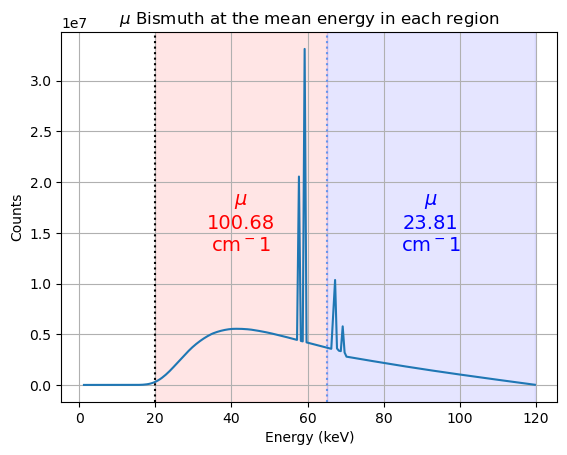

In [34]:
# Find the closes xx and xx2 values to the k-edge energies
k_bi_index = np.argmin(np.abs(xx - k_bi))
k_gd_index = np.argmin(np.abs(xx2 - k_gd))
k_W_index = np.argmin(np.abs(xx - 69.5))
k_20_index = np.argmin(np.abs(xx - 20))

k_70 = 70
k_65 = 65
k_70_index = np.argmin(np.abs(xx - k_70))
k_65_index = np.argmin(np.abs(xx2 - k_65))

# Calculate the percent of the fluence between the k-edges 
fluence_to_65_120 = np.sum(yy[k_20_index:k_65_index]) / np.sum(yy)
fluence_to_70_140 = np.sum(yy2[k_20_index:k_70_index]) / np.sum(yy2)
fluence_65_to_120 = np.sum(yy[k_65_index:]) / np.sum(yy)
fluence_70_to_140 = np.sum(yy2[k_70_index:]) / np.sum(yy2)


# Find the mean energy in each num_regions

# Calculate the mean energy in each num_regions as a weighted average of the energy time the fluence in each bin
mean_energy_to_65_120 = np.sum(xx[k_20_index:k_65_index]*(yy[k_20_index:k_65_index]/np.sum(yy[k_20_index:k_65_index])))
mean_energy_to_70_140 = np.sum(xx2[k_20_index:k_70_index]*(yy2[k_20_index:k_70_index]/np.sum(yy2[k_20_index:k_70_index])))
mean_energy_65_120 = np.sum(xx[k_65_index:]*(yy[k_65_index:]/np.sum(yy[k_65_index:])))
mean_energy_70_140 = np.sum(xx2[k_70_index:]*(yy2[k_70_index:]/np.sum(yy2[k_70_index:])))
                                
plt.figure()
plt.plot(xx, yy, label='120 kVp')
# plt.plot(xx2, yy2, label='140 kVp')
# plot the k_bismuth and k_gadolinium lines
# plot the k_tungsten line as well
# Show the percent of the fluence between the k-edges
plt.axvline(k_20, color='k', linestyle=':', label=f'20 keV bin')
plt.axvline(k_65, linestyle=':', label=f'65 keV bin',color='cornflowerblue')
# plt.axvline(k_70, linestyle=':', label=f'70 keV bin',color='orange')

# mu_at_mean_energy_120 = mu_bi(mean_energy_120)
# mu_at_mean_energy_140 = mu_bi(mean_energy_140)

mu_at_mean_energy_to_65_120 = mu_bi(mean_energy_to_65_120)
# mu_at_mean_energy_to_70_140 = mu_bi(mean_energy_to_70_140)
mu_at_mean_energy_65_120 = mu_bi(mean_energy_65_120)
# mu_at_mean_energy_70_140 = mu_bi(mean_energy_70_140)

# show the percent of the fluence between the k-edges in each num_regions
plt.text((k_65+20)/2, 0.4*max(yy), f'$\mu$\n{mu_at_mean_energy_to_65_120:.2f}\ncm$^{-1}$',color='r',ha='center',fontsize=14)
# plt.text((k_70+20)/2, 0.6*max(yy), f'{mu_at_mean_energy_to_70_140:.2f}\ncm$^{-1}$',color='orange',ha='center')
plt.text((k_65+max(xx))/2, 0.4*max(yy), f'$\mu$\n{mu_at_mean_energy_65_120:.2f}\ncm$^{-1}$',color='b',ha='center',fontsize=14)
# plt.text((k_70+max(xx))/2, 0.6*max(yy), f'{mu_at_mean_energy_70_140:.2f}\ncm$^{-1}$',color='orange',ha='center')
# show the mean energy in each of the regions 
# plt.text((k_65+20)/2, 0.6*max(yy), f'$E$\n{mean_energy_to_65_120:.2f}\nkeV',color='r',ha='center',fontsize=14)
# # plt.text((k_70+20)/2, 0.6*max(yy), f'{mean_energy_to_70_140:.2f}\nkeV',color='orange',ha='center')
# plt.text((k_65+max(xx))/2, 0.6*max(yy), f'$E$\n{mean_energy_65_120:.2f}\nkeV',color='b',ha='center',fontsize=14)

plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.grid()
plt.title('$\mu$ Bismuth at the mean energy in each region')
# plt.legend()

plt.axvspan(k_20, k_65, color='r', alpha=0.1, label='low energy image')
plt.axvspan(k_65, max(xx), color='b', alpha=0.1, label='high energy image')

# Save the plot
plt.savefig('spectra_bi_gd_mu_bi_real_mu.png', dpi=300)

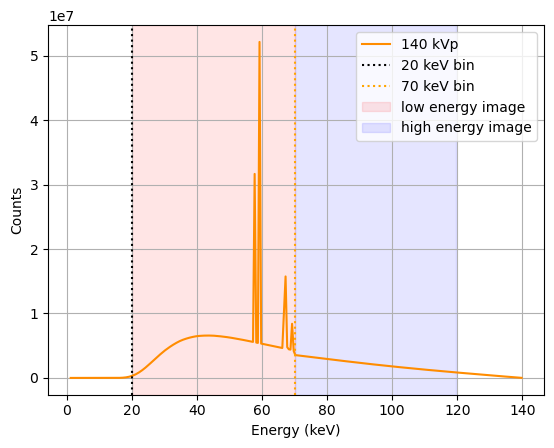

In [20]:
# Find the closes xx and xx2 values to the k-edge energies
k_bi_index = np.argmin(np.abs(xx - k_bi))
k_gd_index = np.argmin(np.abs(xx2 - k_gd))
k_W_index = np.argmin(np.abs(xx - 69.5))
k_20_index = np.argmin(np.abs(xx - 20))

k_20 =20
k_70 = 70
k_65 = 65
k_70_index = np.argmin(np.abs(xx - k_70))
k_65_index = np.argmin(np.abs(xx2 - k_65))

# Calculate the percent of the fluence between the k-edges 
fluence_to_65_120 = np.sum(yy[k_20_index:k_65_index]) / np.sum(yy)
fluence_to_70_140 = np.sum(yy2[k_20_index:k_70_index]) / np.sum(yy2)
fluence_65_to_120 = np.sum(yy[k_65_index:]) / np.sum(yy)
fluence_70_to_140 = np.sum(yy2[k_70_index:]) / np.sum(yy2)


# Find the mean energy in each num_regions

# Calculate the mean energy in each num_regions as a weighted average of the energy time the fluence in each bin
mean_energy_to_65_120 = np.sum(xx[k_20_index:k_65_index]*(yy[k_20_index:k_65_index]/np.sum(yy[k_20_index:k_65_index])))
mean_energy_to_70_140 = np.sum(xx2[k_20_index:k_70_index]*(yy2[k_20_index:k_70_index]/np.sum(yy2[k_20_index:k_70_index])))
mean_energy_65_120 = np.sum(xx[k_65_index:]*(yy[k_65_index:]/np.sum(yy[k_65_index:])))
mean_energy_70_140 = np.sum(xx2[k_70_index:]*(yy2[k_70_index:]/np.sum(yy2[k_70_index:])))
                                
plt.figure()
# plt.plot(xx, yy, label='120 kVp')
plt.plot(xx2, yy2, label='140 kVp', c = 'darkorange')

# plot the k_bismuth and k_gadolinium lines
# plot the k_tungsten line as well
# Show the percent of the fluence between the k-edges
plt.axvline(k_20, color='k', linestyle=':', label=f'20 keV bin')
# plt.axvline(k_65, linestyle=':', label=f'65 keV bin',color='cornflowerblue')
plt.axvline(k_70, linestyle=':', label=f'70 keV bin',color='orange')

# plot to regions between the k_20 and the k_65 and k_65 and the end of the spectrum
# plt.axvspan(k_20, k_65, color='r', alpha=0.1, label='low energy image')
# plt.axvspan(k_65, max(xx), color='b', alpha=0.1, label='high energy image')
# plot to regions between the k_20 and the k_70 and k_70 and the end of the spectrum
plt.axvspan(k_20, k_70, color='r', alpha=0.1, label='low energy image')
plt.axvspan(k_70, max(xx), color='b', alpha=0.1, label='high energy image')

# mu_at_mean_energy_120 = mu_bi(mean_energy_120)
# mu_at_mean_energy_140 = mu_bi(mean_energy_140)

mu_at_mean_energy_to_65_120 = mu_bi(mean_energy_to_65_120)
mu_at_mean_energy_to_70_140 = mu_bi(mean_energy_to_70_140)
mu_at_mean_energy_65_120 = mu_bi(mean_energy_65_120)
mu_at_mean_energy_70_140 = mu_bi(mean_energy_70_140)

# show the percent of the fluence between the k-edges in each num_regions
# plt.text((k_65+20)/2, 0.4*max(yy), f'{mu_at_mean_energy_to_65_120:.2f}\ncm$^{-1}$',color='cornflowerblue',ha='center')
# plt.text((k_70+20)/2, 0.6*max(yy), f'{mu_at_mean_energy_to_70_140:.2f}\ncm$^{-1}$',color='orange',ha='center')
# plt.text((k_65+max(xx))/2, 0.4*max(yy), f'{mu_at_mean_energy_65_120:.2f}\ncm$^{-1}$',color='cornflowerblue',ha='center')
# plt.text((k_70+max(xx))/2, 0.6*max(yy), f'{mu_at_mean_energy_70_140:.2f}\ncm$^{-1}$',color='orange',ha='center')


plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.grid()
plt.legend()
# plt.title('$\mu$ Bismuth at the mean energy in each region')
# plt.legend()

# Save the plot
plt.savefig('spectra_140_bins.png', dpi=300)

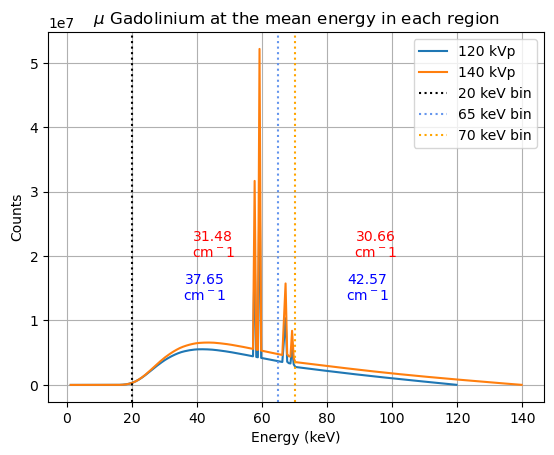

In [81]:
# Find the closes xx and xx2 values to the k-edge energies
k_bi_index = np.argmin(np.abs(xx - k_bi))
k_gd_index = np.argmin(np.abs(xx2 - k_gd))
k_W_index = np.argmin(np.abs(xx - 69.5))
k_20_index = np.argmin(np.abs(xx - 20))

k_70 = 70
k_65 = 65
k_70_index = np.argmin(np.abs(xx - k_70))
k_65_index = np.argmin(np.abs(xx2 - k_65))

# Calculate the percent of the fluence between the k-edges 
fluence_to_65_120 = np.sum(yy[k_20_index:k_65_index]) / np.sum(yy)
fluence_to_70_140 = np.sum(yy2[k_20_index:k_70_index]) / np.sum(yy2)
fluence_65_to_120 = np.sum(yy[k_65_index:]) / np.sum(yy)
fluence_70_to_140 = np.sum(yy2[k_70_index:]) / np.sum(yy2)


# Find the mean energy in each num_regions

# Calculate the mean energy in each num_regions as a weighted average of the energy time the fluence in each bin
mean_energy_to_65_120 = np.sum(xx[k_20_index:k_65_index]*(yy[k_20_index:k_65_index]/np.sum(yy[k_20_index:k_65_index])))
mean_energy_to_70_140 = np.sum(xx2[k_20_index:k_70_index]*(yy2[k_20_index:k_70_index]/np.sum(yy2[k_20_index:k_70_index])))
mean_energy_65_120 = np.sum(xx[k_65_index:]*(yy[k_65_index:]/np.sum(yy[k_65_index:])))
mean_energy_70_140 = np.sum(xx2[k_70_index:]*(yy2[k_70_index:]/np.sum(yy2[k_70_index:])))
                                
plt.figure()
plt.plot(xx, yy, label='120 kVp')
plt.plot(xx2, yy2, label='140 kVp')
# plot the k_bismuth and k_gadolinium lines
# plot the k_tungsten line as well
# Show the percent of the fluence between the k-edges
plt.axvline(k_20, color='k', linestyle=':', label=f'20 keV bin')
plt.axvline(k_65, linestyle=':', label=f'65 keV bin',color='cornflowerblue')
plt.axvline(k_70, linestyle=':', label=f'70 keV bin',color='orange')

# mu_at_mean_energy_120 = mu_bi(mean_energy_120)
# mu_at_mean_energy_140 = mu_bi(mean_energy_140)

mu_at_mean_energy_to_65_120 = mu_gd(mean_energy_to_65_120)
mu_at_mean_energy_to_70_140 = mu_gd(mean_energy_to_70_140)
mu_at_mean_energy_65_120 = mu_gd(mean_energy_65_120)
mu_at_mean_energy_70_140 = mu_gd(mean_energy_70_140)

# show the percent of the fluence between the k-edges in each num_regions
plt.text((k_65+20)/2, 0.4*max(yy), f'{mu_at_mean_energy_to_65_120:.2f}\ncm$^{-1}$',color='b',ha='center')
plt.text((k_70+20)/2, 0.6*max(yy), f'{mu_at_mean_energy_to_70_140:.2f}\ncm$^{-1}$',color='red',ha='center')
plt.text((k_65+max(xx))/2, 0.4*max(yy), f'{mu_at_mean_energy_65_120:.2f}\ncm$^{-1}$',color='b',ha='center')
plt.text((k_70+max(xx))/2, 0.6*max(yy), f'{mu_at_mean_energy_70_140:.2f}\ncm$^{-1}$',color='red',ha='center')


plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.grid()
plt.title('$\mu$ Gadolinium at the mean energy in each region')
plt.legend()

# Save the plot
plt.savefig('spectra_bi_gd_mu_gd_real.png', dpi=300)

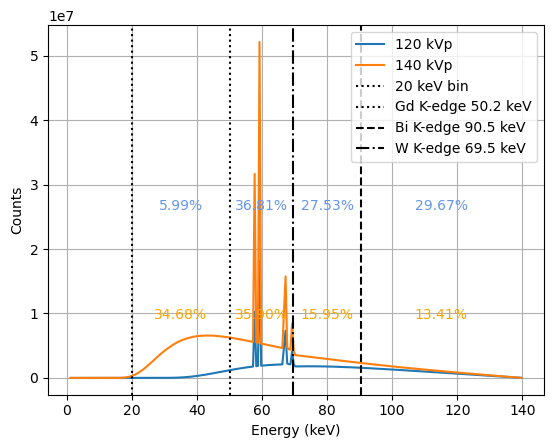

In [84]:
s = sp.Spek(140,14)
s.filter('Al',4)
s.filter('Ti',0.89)
s.filter('Cu',0.5)

xx, yy = s.get_spectrum()

# Find the closes xx and xx2 values to the k-edge energies
k_bi_index = np.argmin(np.abs(xx - k_bi))
k_gd_index = np.argmin(np.abs(xx2 - k_gd))
k_W_index = np.argmin(np.abs(xx - 69.5))
k_20_index = np.argmin(np.abs(xx - 20))

k_20 = 20
k_W = 69.5
# Calculate the percent of the fluence between the k-edges 
fluence_to_gd_120 = np.sum(yy[k_20_index:k_gd_index]) / np.sum(yy)
fluence_to_gd_140 = np.sum(yy2[k_20_index:k_gd_index]) / np.sum(yy2)
fluence_gd_to_W_120 = np.sum(yy[k_gd_index:k_W_index]) / np.sum(yy)
fluence_gd_to_W_140 = np.sum(yy2[k_gd_index:k_W_index]) / np.sum(yy2)
fluence_W_to_bi_120 = np.sum(yy[k_W_index:k_bi_index]) / np.sum(yy)
fluence_W_to_bi_140 = np.sum(yy2[k_W_index:k_bi_index]) / np.sum(yy2)
fluence_bi_120 = np.sum(yy[k_bi_index:]) / np.sum(yy)
fluence_bi_140 = np.sum(yy2[k_bi_index:]) / np.sum(yy2)

plt.figure()
plt.plot(xx, yy, label='120 kVp')
plt.plot(xx2, yy2, label='140 kVp')
# plot the k_bismuth and k_gadolinium lines
# plot the k_tungsten line as well
# Show the percent of the fluence between the k-edges
plt.axvline(k_20, color='k', linestyle=':', label=f'20 keV bin')
plt.axvline(k_gd, color='k', linestyle=':', label=f'Gd K-edge {k_gd} keV')
plt.axvline(k_bi, color='k', linestyle='--', label=f'Bi K-edge {k_bi} keV')
plt.axvline(69.5, color='k', linestyle='-.', label=f'W K-edge 69.5 keV')

# show the percent of the fluence between the k-edges in each num_regions
plt.text((k_gd+20)/2, 0.5*max(yy2), f'{fluence_to_gd_120:.2%}',color='cornflowerblue',ha='center')
plt.text((k_gd+k_W)/2, 0.5*max(yy2), f'{fluence_gd_to_W_120:.2%}',color='cornflowerblue',ha='center')
plt.text((k_W+k_bi)/2, 0.5*max(yy2), f'{fluence_W_to_bi_120:.2%}',color='cornflowerblue',ha='center')
plt.text((k_bi+max(xx))/2, 0.5*max(yy2), f'{fluence_bi_120:.2%}',color='cornflowerblue',ha='center')

plt.text((k_gd+20)/2, 0.5*max(yy), f'{fluence_to_gd_140:.2%}',color='orange',ha='center')
plt.text((k_gd+k_W)/2, 0.5*max(yy), f'{fluence_gd_to_W_140:.2%}',color='orange',ha='center')
plt.text((k_W+k_bi)/2, 0.5*max(yy), f'{fluence_W_to_bi_140:.2%}',color='orange',ha='center')
plt.text((k_bi+max(xx))/2, 0.5*max(yy), f'{fluence_bi_140:.2%}',color='orange',ha='center')

plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.grid()
plt.legend()

# Save the plot
plt.savefig('spectra_bi_gd_hard_spec.png', dpi=300)

Text(0, 0.5, 'Fluence')

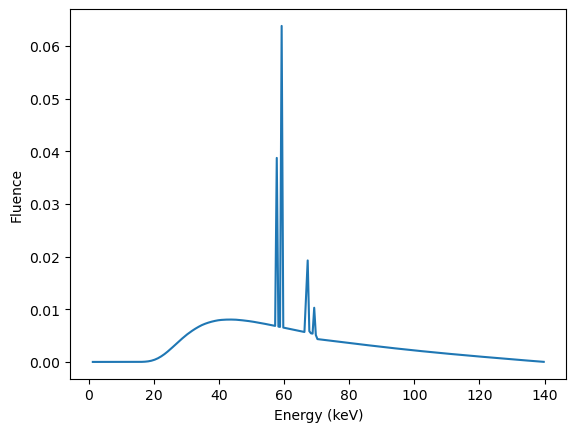

In [6]:
s = sp.Spek(140,14)
s.filter('Al',4)

plt.figure()
plt.plot(s.get_spectrum()[0],s.get_spectrum()[1]/np.sum(s.get_spectrum()[1]),label='140 kVp')
plt.xlabel('Energy (keV)')
plt.ylabel('Fluence')


In [5]:
import spekpy as sp
import numpy as np
import matplotlib.pyplot as plt

In [8]:
import fastcat as fc

phantom = fc.Catphan_404_Devon()

[2024-02-06 16:00:47,051] {colorbar.py:859} DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7f5deef77dd0>


(-0.5, 511.5, 511.5, -0.5)

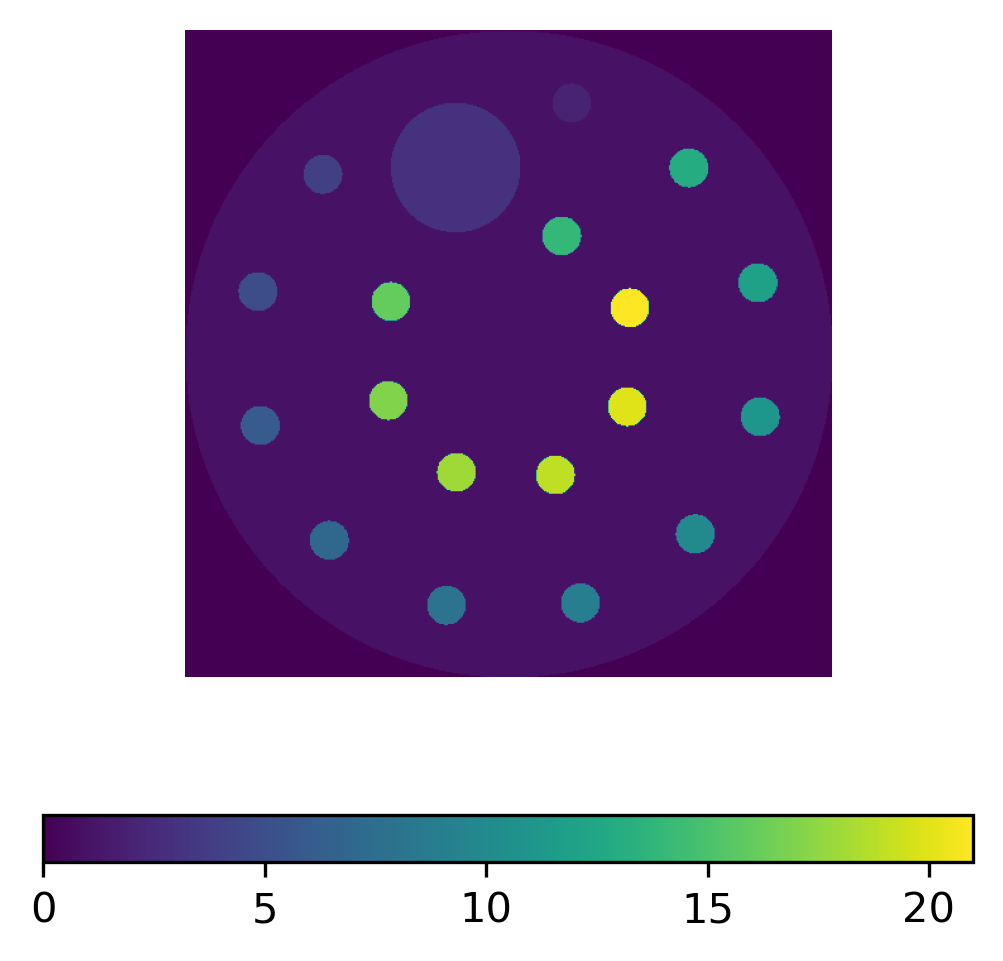

In [12]:
plt.figure(figsize=[    4,  4], dpi=300)
plt.imshow(phantom.phantom[5])
plt.colorbar(orientation='horizontal')
plt.axis('off')